# Writing data to and reading data from a Database using Python

## Libraries and settings

In [1]:
# Libraries
import os
import sqlite3
import fnmatch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Function to close a sqlite db-connection
def check_conn(conn):
     try:
        conn.cursor()
        return True
     except Exception as ex:
        return False

# Get current working directory
print(os.getcwd())

/Users/adisaljusi/repos/data_analytics/Week_02


## Create sqlite data base

In [2]:
# Create data base
conn = sqlite3.connect('apartment_database.db') 
cursor = conn.cursor()

# Show dbs in the directory
flist = fnmatch.filter(os.listdir('.'), '*.db')
for i in flist:
    print(i)

supermarkets_database.db
apartment_database.db


## Create SQL-table in the database

In [3]:
cursor.execute('''CREATE TABLE IF NOT EXISTS apartments_table (OrderId VARCHAR(50),
                                                               Adress VARCHAR(200),
                                                               Rooms DECIMAL(8,2),
                                                               Area INT(8),
                                                               Price DECIMAL(8,2))''')
# Confirm changes to the table
conn.commit()

## Read data from file to data frame

In [4]:
df = pd.read_csv('apartments_data_prepared.csv',
                  sep=',', 
                  encoding='utf-8')[['web-scraper-order', 'address_raw', 'rooms', 'area', 'price']]
print(df.shape)
df.head(5)

(1008, 5)


,web-scraper-order,address_raw,rooms,area,price
0,1693998201-1,"Neuhusstrasse 6, 8630 Rüti ZH, ZH",3.0,49.0,1441.0
1,1693998201-2,"Zürcherstrasse 1, 8173 Neerach, ZH",3.5,65.0,1850.0
2,1693998201-3,"Cramerstrasse 8-12, 8004 Zürich, ZH",NaN,NaN,2686.0
3,1693998201-4,"Cramerstrasse 8-12, 8004 Zürich, ZH",2.0,54.0,4853.0
4,1693998201-5,"Rotachstrasse 33, 8003 Zürich, ZH",2.0,49.0,4335.0


## Write data to the SQL-table in data base

In [5]:
df.to_sql(name = 'apartments_table',
          con = conn,
          index = False,
          if_exists = 'replace')

1008

## Query the SQL-table

In [6]:
# Query the SQL-table
cursor.execute('''SELECT *
               FROM apartments_table
               WHERE rooms >=1''')

df = pd.DataFrame(cursor.fetchall(), 
                  columns=['OrderId','Address','Rooms','Area','Price'])    
df

,OrderId,Address,Rooms,Area,Price
0,1693998201-1,"Neuhusstrasse 6, 8630 Rüti ZH, ZH",3.0,49.0,1441.0
1,1693998201-2,"Zürcherstrasse 1, 8173 Neerach, ZH",3.5,65.0,1850.0
2,1693998201-4,"Cramerstrasse 8-12, 8004 Zürich, ZH",2.0,54.0,4853.0
3,1693998201-5,"Rotachstrasse 33, 8003 Zürich, ZH",2.0,49.0,4335.0
4,1693998201-16,"Wolframplatz 1, 8045 Zürich, ZH",2.0,32.0,3515.0
...,...,...,...,...,...
958,1693998381-1004,"Hölderlinstrasse 12, 8032 Zürich, ZH",3.5,82.0,2830.0
959,1693998381-1005,"Hegifeldstrasse 70, 8404 Reutlingen (Winterthu...",4.0,73.0,1713.0
960,1693998381-1006,"Holzmoosrütisteig 2b, 8820 Wädenswil, ZH",4.5,110.0,3500.0
961,1693998381-1007,"Vogelbuckstrasse 25, 8307 Effretikon, ZH",3.0,68.0,1650.0


## Plot histogramm of rental prices

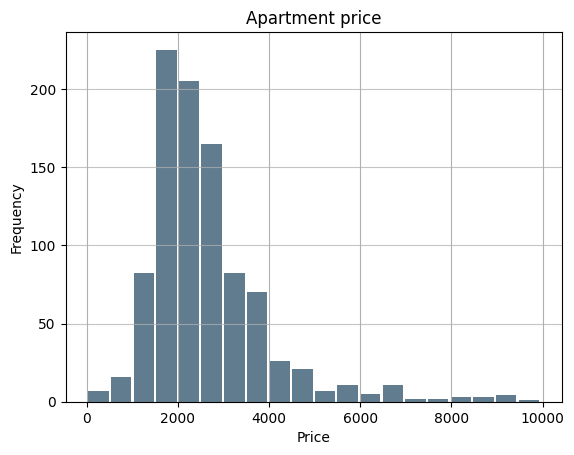

In [7]:
df.Price.plot.hist(grid=True, 
                   bins=20, 
                   rwidth=0.9,
                   color='#607c8e')
plt.title('Apartment price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

### Additional SQL-Queries

In [8]:
cursor.execute('''SELECT *
               FROM apartments_table
               WHERE rooms >= 4.0 AND area >= 100''')

df_filtered = pd.DataFrame(cursor.fetchall(), 
                          columns=['OrderId','Address','Rooms','Area','Price'])    
df_filtered

,OrderId,Address,Rooms,Area,Price
0,1693998205-26,"Frowiesstrasse 36, 8344 Bäretswil, ZH",5.5,140.0,2750.0
1,1693998205-27,"Kanzleistrasse 15, 8418 Schlatt ZH, ZH",4.5,104.0,2700.0
2,1693998205-29,"Bolletweg 14, 8934 Knonau, ZH",5.5,150.0,3390.0
3,1693998205-31,"Adlergass 6, 8805 Richterswil, ZH",5.5,165.0,NaN
4,1693998205-33,"Haldenstrasse 67, 8602 Wangen b. Dübendorf, ZH",4.5,118.0,3390.0
...,...,...,...,...,...
234,1693998381-998,"Tösstalstrasse 12, 8492 Wila, ZH",4.5,109.0,1980.0
235,1693998381-999,"Murzlenstrasse 66, 8166 Niederweningen, ZH",4.5,111.0,2700.0
236,1693998381-1001,"Murzlenstrasse 66, 8166 Niederweningen, ZH",4.5,111.0,2800.0
237,1693998381-1006,"Holzmoosrütisteig 2b, 8820 Wädenswil, ZH",4.5,110.0,3500.0


In [9]:
cursor.execute('''SELECT rooms, AVG(price) avg_price
               FROM apartments_table
               GROUP BY rooms''')

df_filtered = pd.DataFrame(cursor.fetchall(), 
                          columns=['rooms', 'avg_price'])    
df_filtered

,rooms,avg_price
0,NaN,3250.844444
1,1.0,1290.311475
2,1.5,2036.418605
3,2.0,2133.375000
4,2.5,2450.907407
5,3.0,2112.017857
6,3.5,2643.370968
7,4.0,2890.257143
8,4.5,3029.432990
9,5.0,2993.333333


In [10]:
cursor.execute('''SELECT rooms, AVG(area) as avg_area
               FROM apartments_table
               GROUP BY rooms''')

df_avg_area = pd.DataFrame(cursor.fetchall(), 
                          columns=['rooms', 'avg_area'])    
df_avg_area

,rooms,avg_area
0,NaN,NaN
1,1.0,32.092593
2,1.5,35.526316
3,2.0,54.428571
4,2.5,67.317881
5,3.0,68.980392
6,3.5,89.858974
7,4.0,96.129032
8,4.5,114.779661
9,5.0,110.000000


#### Reuse existing supermarkets clean up 

In [11]:
import pandas as pd

df_supermarkets = pd.read_json('supermarkets.json')
df_supermarkets_tags = pd.DataFrame.from_records(df_supermarkets.tags)
df_supermarkets_tags = df_supermarkets_tags[['brand', 'shop', 'addr:city', 'addr:street', 'addr:housenumber', 'addr:postcode', 'opening_hours']]

# Rename selected columns
df_supermarkets_tags = df_supermarkets_tags.rename(columns={'addr:city': 'city',
                          'addr:street':'street',
                          'addr:housenumber': 'housenumber',
                          'addr:postcode': 'postcode',})


# Merge df and df2
df_supermarket_clean = pd.merge(df_supermarkets[['type', 'id', 'lat', 'lon']], 
              df_supermarkets_tags[['brand', 'shop', 'city', 'street', 'housenumber', 'postcode', 'opening_hours']],
              left_index=True, 
              right_index=True)
df_supermarket_clean.head(5)

,type,id,lat,lon,brand,shop,city,street,housenumber,postcode,opening_hours
0,node,33126515,47.155616,9.037915,Spar,supermarket,NaN,NaN,NaN,NaN,Mo-Th 08:00-19:00; Fr 08:00-20:00; Sa 08:00-17:00
1,node,36726161,47.226191,8.980329,Migros,supermarket,Uznach,Zürcherstrasse,25,8730,"Mo-Th 08:00-19:00, Fr 08:00-20:00, Sa 07:30-17..."
2,node,39768209,47.225069,8.969981,Coop,supermarket,Uznach,NaN,NaN,8730,NaN
3,node,39947904,47.376732,8.542161,Coop,supermarket,Zürich,Bahnhofbrücke,1,8001,Mo-Sa 06:00-22:00
4,node,48932835,47.375020,8.522895,Migros,supermarket,Zürich,Wengistrasse,7,8004,Mo-Sa 08:00-21:00; PH off


In [12]:

conn_supermarkets = sqlite3.connect('supermarkets_database.db')
cursor_supermarkets = conn_supermarkets.cursor()

# Create table for supermarkets
cursor_supermarkets.execute('''
    CREATE TABLE IF NOT EXISTS supermarkets (
        id INTEGER PRIMARY KEY,
        type TEXT,
        lat REAL,
        lon REAL,
        brand TEXT,
        shop TEXT,
        city TEXT,
        street TEXT,
        housenumber TEXT,
        postcode TEXT,
        opening_hours TEXT
    )
''')
conn_supermarkets.commit()

# Write data to the SQL-table
df_supermarket_clean.to_sql(name='supermarkets', con=conn_supermarkets, index=False, if_exists='replace')

3392

In [13]:
cursor_supermarkets.execute('''
    SELECT * FROM supermarkets
    WHERE city = "Winterthur"
''')
df_winterthur_supermarkets = pd.DataFrame(cursor_supermarkets.fetchall(), columns=[desc[0] for desc in cursor_supermarkets.description])
df_winterthur_supermarkets

,type,id,lat,lon,brand,shop,city,street,housenumber,postcode,opening_hours
0,node,70656488,47.491874,8.706448,Migros,supermarket,Winterthur,Zürcherstrasse,102,8406,Mo-Fr 07:30-20:00; PH off; Sa 08:00-19:00
1,node,246533376,47.518953,8.720071,Migros,supermarket,Winterthur,Schaffhauserstrasse,152,8400,"Mo-Fr 08:30-20:00, Sa 08:00-18:00; PH off"
2,node,548919417,47.506863,8.712208,Migros,supermarket,Winterthur,Wülflingerstrasse,71,8400,"Mo-Fr 07:30-20:00, Sa 08:00-18:00; PH off"
3,node,677194765,47.503208,8.752131,None,supermarket,Winterthur,Frauenfelderstrasse,69,8404,None
4,node,706203439,47.500848,8.725938,None,supermarket,Winterthur,Bankstrasse,8/12,8400,"Mo-Fr 08:30-20:00; Sa 08:00-20:00; Su,PH off"
5,node,709022324,47.498421,8.729118,None,supermarket,Winterthur,Steinberggasse,18,8400,"Tu,Fr 08:30-13:00,14:00-18:00; We,Th 09:00-13:..."
6,node,1328945987,47.485289,8.762742,Migros,supermarket,Winterthur,Hinterdorfstrasse,40,8405,"Mo-We 08:00-19:00; Th,Fr 08:00-20:00; Sa 08:00..."
7,node,1519474175,47.485171,8.763196,Denner,supermarket,Winterthur,Hinterdorfstrasse,40,8405,Mo-We 08:30-19:00; Th-Fr 08:30-20:00; Sa 08:00...
8,node,3831772784,47.499163,8.721153,Migros,supermarket,Winterthur,Strickerstrasse,3,8400,"Mo-Fr 08:00-20:00, Sa 08:00-18:00; PH off"
9,node,4058248551,47.500117,8.731930,Migros,supermarket,Winterthur,Stadthausstrasse,31,8400,"Mo-Fr 07:00-20:00, Sa 08:00-18:00; PH off"


## Close db connection (if open)

In [14]:
# # Close db connection (if open)
# try:
#     if check_conn(conn):
#         conn.close()
#     else:
#         pass
# except:
#     pass

# # Status (True = open, False = closed)
# print(check_conn(conn))

### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [15]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Darwin | 25.0.0
Datetime: 2025-10-09 10:27:29
Python Version: 3.11.13
-----------------------------------
